In [22]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [53]:
from brush import BrushPara
import numpy as np
from lmfit import Parameters, printfuncs
from refnx.analysis import Transform, CurveFitter
from refnx.dataset import ReflectDataset
%matplotlib inline
import matplotlib.pyplot as plt

In [54]:
# load the dataset

d = ReflectDataset('c_PLP0026107.dat')

In [55]:
t = Transform('logY').transform

In [56]:
# Transform the data to log R
d.y, d.y_err = t(d.x, d.y, d.y_err)

In [57]:
a = BrushPara(0.46, 3, n_slices=25, dq=9, transform=t)

In [58]:
a.parameter_names()

['scale',
 'bkg',
 'SLD_super',
 'SLD_sub',
 'thickness_SiO2',
 'SLD_SiO2',
 'roughness_SiO2',
 'roughness_backing',
 'phi_init',
 'thickness_tail',
 'roughness_tail2int',
 'thickness_1',
 'phi_1',
 'roughness_1',
 'thickness_2',
 'phi_2',
 'roughness_2',
 'thickness_3',
 'phi_3',
 'roughness_3']

In [59]:
vals = [1, 1e-6, 2.07, 6.11, 8.8, 3.25, 3.5,10, 0.1, 1000, 4,
            28, 0.95, 2, 50, 0.85, 2, 100, 0.2, 20]
lbs = [0.8, 1e-7, 2.06, 6.10, 8.7, 3.24, 3.4, 2, 0.006, 50,3,
            10, 0.1, 2, 10, 0.1, 2, 10, 0.1, 2]
ubs = [1.1, 1e-6, 2.08, 6.36, 8.9, 3.26, 3.6, 10, 0.5, 500,8,
            50, 0.8, 10, 50, 0.8, 10, 50, 0.8, 10]
varies = np.array([True] * 20, bool)
varies[[2,3,4,5,6]] = False

In [60]:
P = Parameters()

In [61]:
for name, val, vary, lb, ub in zip(a.parameter_names(), vals, varies, lbs, ubs):
    P.add(name, val, vary, lb, ub)

In [62]:
slab_pars = a.to_slab(P)

In [63]:
assert(slab_pars[0] * 4 + 8 == np.size(slab_pars))

In [64]:
dir(a)

['__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'callback',
 'dq',
 'gen_par',
 'model',
 'moment',
 'n_interior',
 'n_slices',
 'parallel',
 'parameter_names',
 'quad_order',
 'set_dq',
 'sld_poly',
 'sld_profile',
 'tail_par',
 'to_slab',
 'transform',
 'vfp_area',
 'vol_cut',
 'vol_fraction']

In [35]:
z, rho = a.sld_profile(P)
z2, rho2 = a.vol_fraction(P)

In [65]:
P['roughness_1']

<Parameter 'roughness_1', 2, bounds=[2:10]>

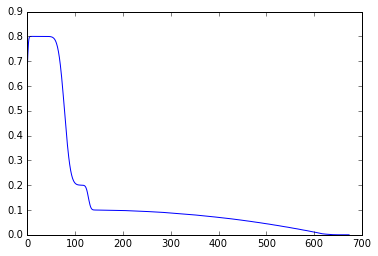

In [66]:
plt.plot(z2,rho2)

In [67]:
area = a.vfp_area(P)
print(area)

105.506996585


In [68]:
q = np.linspace(0.01, 0.3, 1000)
ref = a.model(q, P)

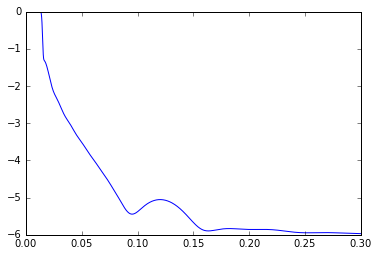

In [40]:
plt.plot(q, ref)
# plt.xscale('log')

In [69]:
# b = CurveFitter(a, (q, ref), P)
# you can give CurveFitter a dataset
b = CurveFitter(a, d, P)

In [70]:
c = b.fit('differential_evolution')

In [71]:
print(printfuncs.fit_report(c))

[[Fit Statistics]]
    # function evals   = 225562
    # data points      = 122
    # variables        = 15
    chi-square         = nan
    reduced chi-square = nan
    Akaike info crit   = nan
    Bayesian info crit = nan
[[Variables]]
    scale:                0.90916301 (init= 1)
    bkg:                  9.9812e-07 (init= 1e-06)
    SLD_super:            2.07 (fixed)
    SLD_sub:              6.11 (fixed)
    thickness_SiO2:       8.8 (fixed)
    SLD_SiO2:             3.25 (fixed)
    roughness_SiO2:       3.5 (fixed)
    roughness_backing:    2.75298844 (init= 10)
    phi_init:             0.26683989 (init= 0.1)
    thickness_tail:       419.893514 (init= 500)
    roughness_tail2int:   3.81348052 (init= 4)
    thickness_1:          11.6751692 (init= 28)
    phi_1:                0.24935195 (init= 0.8)
    roughness_1:          2.31963682 (init= 2)
    thickness_2:          13.1522562 (init= 50)
    phi_2:                0.47642164 (init= 0.8)
    roughness_2:          3.77092128 

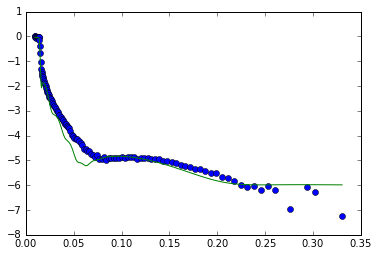

In [72]:
fit_ref = a.model(d.x,c.params)
plt.plot(d.x,d.y,'o',d.x,fit_ref,'-')

In [45]:
c.params

Parameters([('scale',
             <Parameter 'scale', 1.0740937341933936, bounds=[0.8:1.1]>),
            ('bkg',
             <Parameter 'bkg', 9.9999999999999995e-07, bounds=[1e-07:1e-06]>),
            ('SLD_super',
             <Parameter 'SLD_super', value=2.07 (fixed), bounds=[2.06:2.08]>),
            ('SLD_sub',
             <Parameter 'SLD_sub', value=6.11 (fixed), bounds=[6.1:6.36]>),
            ('thickness_SiO2',
             <Parameter 'thickness_SiO2', value=8.8 (fixed), bounds=[8.7:8.9]>),
            ('SLD_SiO2',
             <Parameter 'SLD_SiO2', value=3.25 (fixed), bounds=[3.24:3.26]>),
            ('roughness_SiO2',
             <Parameter 'roughness_SiO2', value=3.5 (fixed), bounds=[3.4:3.6]>),
            ('roughness_backing',
             <Parameter 'roughness_backing', 5.3067834868580075, bounds=[2:10]>),
            ('phi_init',
             <Parameter 'phi_init', 0.019841064866851603, bounds=[0.006:0.5]>),
            ('thickness_tail',
             <Paramete

In [47]:
a.vfp_area(c.params)

90.226280741445265

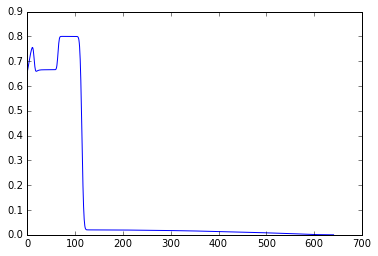

In [48]:
z, rho = a.vol_fraction(c.params)
plt.plot(z,rho)